# FHW 201700201008 胡云海 建筑 大三

1获取当日排行榜

In [1]:
import requests
import re
import json
import os
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)      #关闭SSL验证
import datetime #获取当日时间

1.1获取B站排行榜的url

In [2]:
def get_url():
    state_url='https://www.bilibili.com/ranking/all/' 
    true_url = state_url+state+'/0/1'  #组成相应的url 
    print(true_url)
    return true_url

1.2获取B站排行榜的html

In [3]:
def get_html(url):
    html = requests.get(url)
    html.encoding='utf-8'
    content=html.text;
    print(html)
    return content

1.3用正则表达式进行解析获取所需内容

In [4]:
def pick_up_state(html):
    pattern=re.compile('<*?num.*?>(\d+).*?<a href=.*?alt=.*?</a>.*?<a href="https://www.bilibili.com/video/(.*?)".*?title">(.*?)</a>'
                      +'.*?<.*?play.*?</i>(.*?)</span>.*?<.*?view.*?</i>(.*?)</span>.*?'+
                      '<.*?href="//space.bilibili.com/(.*?)".*?>.*?<.*?author.*?</i>(.*?)</span>.*?',re.S)
    items =re.findall(pattern, html)
    print(items)
    for item in items:
        yield{
           'ranking':item[0],
           'palyHerf':item[1],
           'title':item[2],
           'play':item[3],
           'view':item[4],
           'authorHome':item[5],
           'author':item[6],        
     }

1.4保存文件

In [5]:
def writeTxt(state,stateAll):
    today=datetime.date.today()
    time =today.strftime("%Y-%m-%d")
    save=stateAll+time+'.txt'
    with open(save,'a',encoding='utf-8') as f:
        f.write(json.dumps(state, ensure_ascii=False) + '\n')
        f.close()     

1.5主程序

In [2]:
if __name__ == '__main__':
    all=['0','1','168','3','129','4','36','188','160','119','155','5','181']    #查看B站相关页面可以知道
    stateAll={'0':'全站',
              '1':'动画',
              '168':'国创相关',
              '3':'音乐',
              '129':'舞蹈',
              '4':'游戏',
              '36':'知识',
              '188':'数码',
              '160':'生活',
              '119':'鬼畜',
              '155':'时尚',
              '5':'娱乐',
              '181':'影视'} 
    for state in all:
        true_url= get_url()  #组成相应的url   
        html=get_html(true_url)
        for stateDate in pick_up_state(html):
            writeTxt(stateDate,stateAll[state])  

[('1', 'BV1Ga4y1e7c6', '冥 币 嫖 娼 定什么罪？', '136.0万', '7370', '37529365', '互动大王'), ('2', 'BV1vi4y1G7Lu', '美国枪支销量暴增80%，深入枪店采访美国人为何囤枪？', '174.2万', '1.6万', '176037767', '我是郭杰瑞'), ('3', 'BV1qz4y1X7ss', '【隐秘的角落·百万剪辑】杀戮之途·你就是我！将34380秒的故事提炼成9分钟的“险恶之旅”！每一秒都是壁纸！', '50.9万', '1193', '41149747', '怪兽电台MonsterBlog'), ('4', 'BV1qg4y1v7zT', '「小白测评」盲人用手机什么感觉？9大品牌无障碍测试 关注视障人群', '38.0万', '4971', '8969156', '小白测评'), ('5', 'BV1Rv411B787', '最 强 汤 姆', '69.1万', '2127', '20530305', '庄不纯'), ('6', 'BV1bC4y1877x', '&quot;杜海皇&quot;之死', '77.7万', '1.3万', '5970160', '小潮院长'), ('7', 'BV1YC4y187Hb', '又是一个无 眠 夜。', '42.8万', '2105', '27756469', '奶糕成精档案社'), ('8', 'BV1Cp4y1U7fp', '消费主义是如何对年轻人进行欺骗与洗脑的？【围炉夜话】', '30.3万', '5051', '79577853', '智能路障'), ('9', 'BV1b54y1z7RL', '【半佛】B站的价值究竟在哪里？', '58.6万', '1.8万', '37663924', '硬核的半佛仙人'), ('10', 'BV1xV41167qm', '【𝟒𝐊 𝟔𝟎𝐅𝐏𝐒】这首《𝑭𝒂𝒍𝒍𝒊𝒏𝒈 𝑨𝒈𝒂𝒊𝒏》如今治愈了多少人！！!  ℳ₯㎕-沉 沦', '19.4万', '859', '30502823', '学姐圆'), ('11', 'BV1mT4y1J7iG', '武松打得过这玩意儿？', '66.4万', '1477', '496783876', '幸运猎手'), ('12', 'BV1DT4y1J7v

[('1', 'BV1Rv411B787', '最 强 汤 姆', '69.1万', '2127', '20530305', '庄不纯'), ('2', 'BV1xV41167qm', '【𝟒𝐊 𝟔𝟎𝐅𝐏𝐒】这首《𝑭𝒂𝒍𝒍𝒊𝒏𝒈 𝑨𝒈𝒂𝒊𝒏》如今治愈了多少人！！!  ℳ₯㎕-沉 沦', '19.4万', '859', '30502823', '学姐圆'), ('3', 'BV1mi4y1G7Rn', '大  威  天  妈', '25.3万', '482', '50844167', '可靠de伏特加'), ('4', 'BV1Fi4y1V7du', '宇智波小少爷想让我告白', '13.2万', '390', '599404508', '闷骚阿暑'), ('5', 'BV15A411e7Wx', '最    强    爷    爷', '20.9万', '428', '31327256', '要来点当归吗'), ('6', 'BV1Jf4y117BF', '别说马赛克了，这些动漫角色化成灰我都认识！【动漫高手02】', '19.4万', '2139', '808171', '吃素的狮子'), ('7', 'BV1xt4y1975D', '天津吉良吉影入驻B站', '15.1万', '244', '1835967', '善良的诚哥'), ('8', 'BV1hv41167xK', '【过于真实】天 下 老 师 皆 是 一 家', '10.2万', '1201', '130130236', '枫泽雨畔'), ('9', 'BV1FZ4y1u7W3', '业界真的要完！2020七月新番推荐', '14.2万', '811', '730732', '瓶子君152'), ('10', 'BV1fZ4y1M7mq', '最深度致敬·EVA·CG作品 |  导演完全版《EVA超·现实》【授权发布】', '7.9万', '130', '59550906', 'wuhu动画人空间'), ('11', 'BV1Qt4y197xB', '【怪诞小镇手书】MONSTER', '4.3万', '402', '11774575', 'R翼君'), ('12', 'BV1Rz4y1Q7tg', '刻进DNA里的画面——前方名场景高能【BILIBILI 11周年】', '7.8万', '436',

[('1', 'BV1UT4y1J77Q', '【中国神话宇宙 07】山海经系列猜想，大禹治水！未曾设想的道路！', '21.3万', '623', '299732210', '-TS映画-'), ('2', 'BV1jZ4y1H76C', '“对不起，我有孩子了”', '16.2万', '131', '190745815', '天罗喵'), ('3', 'BV1754y1z7g9', '“有孩子又怎样，孩子他爸都没了，要不我们…”', '5.7万', '87', '247986653', '月下温柔风'), ('4', 'BV1QZ4y1M7y9', 'B站那些评分超高的2D国漫！千万不能错过！【橘说国创#4】', '5.1万', '389', '21115110', '橘子想吃柠檬'), ('5', 'BV1op4y1U7fc', '雷 狮 不 要 心 动 挑 战！限时1分48秒！你能坚持多久？【凹凸世界/勉强踩点燃向/雷狮个人】', '1.1万', '192', '17523738', '日尧双习'), ('6', 'BV1jK411H7PJ', '玄机奇侠传3《生生世世爱》（加长版）', '2.4万', '160', '48255112', 'Time时代化'), ('7', 'BV1Ef4y117pv', '临时工实力排名（七）：体术差还怂的老孟凭什么是第一？！', '3.5万', '150', '17055002', '5毒士'), ('8', 'BV1Lg4y1q7jK', '喜羊羊原来可以这么燃', '2.3万', '186', '12876332', '霍顿'), ('9', 'BV1YA411i7Gc', '【斗罗奇侠传】用仙剑三的方式打开斗罗大陆！', '2.1万', '65', '291903961', '解风催龙羽'), ('10', 'BV1Bz4y1Q7PV', '小时候听里面的台词和现在的感觉不一样了', '2.1万', '22', '396392981', '本丑男长命百岁'), ('11', 'BV1bZ4y1W7hX', '【斗罗大陆】一集封神！有多少人被这首歌燃哭了！', '1.9万', '28', '36013830', '姬弦-zy'), ('12', 'BV1RK411p7A6', '《大理寺日志》超 帅 踩 点 ！',

[('1', 'BV12p4y1U7Xe', '【黄龄】今天也是越来越《喜欢你》们的一天吖！', '40.0万', '2338', '345630501', '黄龄'), ('2', 'BV1SC4y1a7jo', "BLACKPINK 回归'How You Like That' MV+现场持更中(更至200628人气歌谣)", '35.0万', '5414', '86469984', 'taerubykim'), ('3', 'BV1Dt4y197dr', '你从没见过的学霸学渣互撕版Doja Cat《Say So》？史上最强高中生改编版！', '18.1万', '340', '23307992', 'SuperA_'), ('4', 'BV1cV41167md', '保温杯演奏Someone You Loved，敲敲（补投❉内有彩蛋）', '15.0万', '1246', '596324576', '音乐制作人Kurt'), ('5', 'BV1QZ4y1M7ca', '【SUNMI_宣美】我的新歌MV来啦！带给你们夏日的“菠萝冰棒”', '17.1万', '2689', '544368017', 'SUNMI_宣美'), ('6', 'BV1T5411Y7n3', '震惊!!不会真的有人能翻唱《Loser》吧?!', '18.8万', '354', '256912050', '章智捷'), ('7', 'BV1Ua4y1Y7ob', '【WNS中字】200627 BTS Love Yourself World Tour @ LONDON 伦敦场 全曲无剪辑完整版', '5.5万', '3345', '14025362', 'WNS_WeNeedBTS'), ('8', 'BV1dZ4y1H79L', 'MAMAMOO华莎最新Solo曲Maria MV公开', '12.9万', '2254', '16720403', 'pcyxjy'), ('9', 'BV1HT4y1J766', 'BLACKPINK 新曲《How you like that》MV公开', '14.4万', '1234', '289848213', '精神擦六'), ('10', 'BV1PV411k7eT', '【喀秋莎】同志们！伏特加！乌拉！！!', '10.9万', '484', '10

[('1', 'BV1VD4y1S7ho', '乘风破浪的姐姐-大碗宽面练习室版舞蹈', '32.1万', '2451', '388130012', '王霏霏Fei'), ('2', 'BV1MZ4y1p7Er', '【舞小喵】短裙-Miniskirt❤性感小野猫来袭~', '10.1万', '75', '2223018', '舞小喵'), ('3', 'BV1pz4y1X7pC', '【卡卡】♦囍♦一尺一恨', '7.9万', '201', '2400404', '卡卡Orange'), ('4', 'BV1rt4y197PW', '【中信银行信用卡中心】超还原书记舞，不看错亿！', '13.8万', '143', '496884292', '中信银行信用卡客服'), ('5', 'BV1eT4y177rC', 'BLACKPINK最新回归曲(How You Like That)欧尼实力舞蹈Cover', '10.1万', '299', '238718278', '娱乐舞蹈视频'), ('6', 'BV1ND4y1S7ui', '『初投稿』要和双马尾女仆一起  ❤️恋爱循环❤️吗 文艺复兴啦！', '5.9万', '58', '8447574', '窝窝奶兔'), ('7', 'BV1rD4y1Q7jc', '不要心动❤️我要开始表白了【欣小萌】', '8.2万', '142', '8366990', '-欣小萌-'), ('8', 'BV1Kp4y1S7wY', '【美豚】Dumhdurum-Apink❤10cm细高跟翻跳', '3.0万', '62', '286035743', 'PhD_美豚'), ('9', 'BV1P54y1z7sj', 'BLACKPINK新歌《How You Like That》副歌教学 镜面分解【Ellen和Brian教学】', '3.9万', '68', '399114140', 'Ellen和Brian'), ('10', 'BV1PK411H7gP', '【张晋的视频】听说你们想看，被迫营业的舞一个', '8.6万', '170', '434734521', 'Max张晋'), ('11', 'BV1j4411W7F7', '【猛男版】新 宝 岛', '6.7万', '296', '930099', '果厨果厨果'), ('1

[('1', 'BV1qg4y1v7L5', '炉石传说：【天天素材库】 第202期', '62.3万', '2960', '10462362', '天天卡牌'), ('2', 'BV1g54y1z7qs', '我的世界坏掉了！！！', '20.1万', '1676', '3334737', '愉悦的hehe11'), ('3', 'BV1uz411v7CK', '【LPL夏季赛】6月28日 饭堂周末夜', '45.9万', '1.5万', '50329118', '哔哩哔哩英雄联盟赛事'), ('4', 'BV1NV41167nt', '【真人GTA】老 年 崔 佛', '26.2万', '507', '3380239', '神奇的老皮'), ('5', 'BV1Dt4y197nJ', '徐老师讲故事132：英雄联盟实体书之符文之地大事记全解析', '25.8万', '4231', '16794231', '靠脸吃饭的徐大王'), ('6', 'BV1ip4y1D7KL', '【爷青回】万万没想到，白客、叫兽新剧来了！四集连播看过瘾', '32.4万', '565', '457047913', '最强蜗牛'), ('7', 'BV1qf4y117v6', '和 风 美 女', '20.0万', '3153', '4162287', '渗透之C君'), ('8', 'BV1bD4y1Q7LF', '老王有媳妇儿了！【德华的世界#6】', '20.0万', '1789', '13354765', '徐大虾咯'), ('9', 'BV1xt4y197ew', '【大仙全家桶】惊世一枪重出江湖？这场表演是否能守护住你的笑容？', '25.4万', '3347', '1935882', '指法芬芳张大仙'), ('10', 'BV1s5411Y7QD', '【剧本杀】百万UP主们勾心斗角（中）', '21.4万', '6941', '8366990', '-欣小萌-'), ('11', 'BV1Yf4y117nS', '拳头官方最骚操作：反向投降bug，自己投降等于帮对面投降？！', '26.1万', '269', '25503580', '布锅锅'), ('12', 'BV1sD4y1Q75E', '【STN快报第五季01】乔尔的命也是命', '16.3万', '1642

[('1', 'BV1Ga4y1e7c6', '冥 币 嫖 娼 定什么罪？', '136.0万', '7370', '37529365', '互动大王'), ('2', 'BV1Cp4y1U7fp', '消费主义是如何对年轻人进行欺骗与洗脑的？【围炉夜话】', '30.3万', '5051', '79577853', '智能路障'), ('3', 'BV1b54y1z7RL', '【半佛】B站的价值究竟在哪里？', '58.6万', '1.8万', '37663924', '硬核的半佛仙人'), ('4', 'BV1PZ4y1u7JK', '【逸语道破09】希拉里，社交媒体政变的发起人，被特朗普用社交媒体干掉了', '35.5万', '7557', '10330740', '观察者网'), ('5', 'BV1eD4y1Q7Bt', '【基德】为什么中国洪水越治理，经济损失越大？这是一种光看数据很容易导致的误区', '25.1万', '4494', '510856133', '吟游诗人基德'), ('6', 'BV1xv411B7qM', '【睡前消息134】有人为“合村并居”批评山东，我想为山东说两句', '40.7万', '8492', '54992199', '观视频工作室'), ('7', 'BV1Df4y117fq', '和中国一样大的太阳系模型！太阳系竟是如此空洞广阔！', '23.9万', '1631', '544503411', '沙琪玛er'), ('8', 'BV1BC4y1a72c', '万人血书急求：全国一卷答案规律！【北清学长被迫营业】', '15.5万', '602', '397706711', '汤茶铺'), ('9', 'BV11T4y1J7Lk', '为了做游戏，我花了10年自学程序、美术、音乐、策划', '13.7万', '1361', '580207', 'AliveGameStudio'), ('10', 'BV1xT4y177Kq', '【罗翔】100g冰毒里掺50g面粉，怎么判？国际禁毒日', '27.7万', '1794', '517327498', '罗翔说刑法'), ('11', 'BV13D4y1S7JZ', '全民反智？看不懂漫威，就看不懂美国(四) : 高科技魔法（B站独家）', '17.5万', '6160'

[('1', 'BV1qg4y1v7zT', '「小白测评」盲人用手机什么感觉？9大品牌无障碍测试 关注视障人群', '38.0万', '4971', '8969156', '小白测评'), ('2', 'BV1mt4y197KU', '用自己设计的ITX机箱组装一台疯狂的高性能分体水冷主机【翼王】', '17.3万', '2812', '475961', '翼王'), ('3', 'BV1cK411H7Tm', '【食瓜】违反装机法！他怎么能对内存做这种事！？', '16.5万', '462', '35359510', '远古时代装机猿'), ('4', 'BV1kz411e7j5', '「科技美学」Surface Book 3开箱体验  | i7-1065G7、32G内存、1660Ti MAX-Q | 猜猜卖多少钱？', '16.6万', '3813', '3766866', '科技美学'), ('5', 'BV1Fz411v7Vj', '【首发】开箱169元&quot;小米屏幕挂灯&quot;！不输千元挂灯！', '13.3万', '696', '3530725', '陈抱一'), ('6', 'BV1fZ4y1M7Qy', '有钱人的玩物还是生产力工具？坑爹的苹果显卡坞维修过程', '10.3万', '1345', '382666849', '笔记本维修厮'), ('7', 'BV1Zv411B7TL', '【北欧摄影短片】雪山、木屋、森林', '3.5万', '70', '38542531', 'Jasmine茉莉与冰川'), ('8', 'BV1UC4y1a79h', '【4K】B站最全面完整的亲妈级电脑教程，从零装一台完美电脑', '1.6万', '36', '383336986', '清云Pro'), ('9', 'BV1zi4y1x7Pa', 'Just ear:泽野弘之联名款 : XJE-MH/nZk', '4.7万', '167', '328303954', '澤野弘之_nZk'), ('10', 'BV1df4y1y7m4', '【酷玩】夏天到了，你的笔记本电脑该清灰了！', '2.1万', '67', '109343452', '酷玩小报'), ('11', 'BV1Cf4y1y7WD', '【4K-装机教程】全网最清晰,最详细,而且没有一

[('1', 'BV1vi4y1G7Lu', '美国枪支销量暴增80%，深入枪店采访美国人为何囤枪？', '174.2万', '1.6万', '176037767', '我是郭杰瑞'), ('2', 'BV1bC4y1877x', '&quot;杜海皇&quot;之死', '77.7万', '1.3万', '5970160', '小潮院长'), ('3', 'BV1YC4y187Hb', '又是一个无 眠 夜。', '42.8万', '2105', '27756469', '奶糕成精档案社'), ('4', 'BV1mT4y1J7iG', '武松打得过这玩意儿？', '66.4万', '1477', '496783876', '幸运猎手'), ('5', 'BV1DT4y1J7vA', '串串配烧烤，大sao第一次尝试本地宵夜大排档，一个人的量真过瘾', '79.6万', '5894', '390461123', '徐大sao'), ('6', 'BV1Kf4y117Kq', '自制欧气检测器', '65.4万', '2268', '280793434', '手工耿'), ('7', 'BV1PZ4y1u7YE', '试吃999元一桶的冰激凌，三种新奇吃法哪种最好吃？', '62.0万', '9219', '2920960', '大祥哥来了'), ('8', 'BV1x5411Y75f', '【朱一旦】203 螳螂扑蝉 黄雀在后', '68.1万', '2020', '437316738', '朱一旦的枯燥生活'), ('9', 'BV1Bz4y1X7FC', '就喜欢这种长得好看还没脑子的', '47.6万', '782', '43979779', '捉鸡小队长'), ('10', 'BV1HC4y1a7BN', '这么完美的男人确实很难遇到', '43.1万', '533', '344677344', 'z走酱巨无霸'), ('11', 'BV1Dp4y1U7r9', '能把一条鱼的鲜美淋漓尽致的体现出来，哪怕做法败家，那也是值得', '30.4万', '2470', '415479453', '厨师长农国栋'), ('12', 'BV16K411n7UH', '“五秒就够了！”', '32.6万', '3332', '5374954', '深海色带鱼'), (

[('1', 'BV1pi4y147tQ', '最 强 法 海', '27.0万', '1192', '96070394', '推背兔の'), ('2', 'BV1Mz4y1X7Nj', '【费玉污】《一剪梅》被删减版本！', '21.9万', '1096', '375375', '伊丽莎白鼠'), ('3', 'BV1g54y1z7YH', '希望鬼畜区没事', '17.7万', '271', '14426615', '天下万物皆可鬼畜'), ('4', 'BV1Ji4y1G7TV', '神仙打架', '17.4万', '1075', '97395295', '一只胖头鱼o'), ('5', 'BV1BA411i75N', '【杨超越】斗地主第一名', '14.5万', '688', '287485905', 'qfegy'), ('6', 'BV1yC4y187Dt', '【对王之王】小伙阿强', '16.4万', '523', '301963634', '吃客伍二零'), ('7', 'BV18T4y1J7dT', '【杨超越爆笑rap】干啥啥不行，rap第一名！（全程高能）', '13.6万', '987', '89338806', '纽毕斯'), ('8', 'BV1mt4y197gZ', '【大司马】马 动 闪 霸', '10.5万', '209', '107079164', '空旷的蓝田'), ('9', 'BV17Z4y1H7NK', '执着的骚猪', '7.0万', '110', '38347595', '风云熊'), ('10', 'BV1cp4y1Q7yn', '每天一遍，北大相见', '6.1万', '147', '7275647', '碧天蓝钻'), ('11', 'BV1VV41167Vc', '当茄子拿起AK47', '7.6万', '21', '31953347', '小果叮233'), ('12', 'BV1pi4y1x7s7', '王 雷 炸 鱼', '6.7万', '83', '5938236', '墨菲potato'), ('13', 'BV1nf4y117Jn', '被期末考试耽误的歌神 ♪一言不合就开唱♪', '6.4万', '399', '7792521', '还有一天就放假了'), ('14', 'BV1GZ4y1p7

[('1', 'BV1SK4y1477d', 'BILIBILI 11周年演讲', '39.1万', '8923', '8047632', '哔哩哔哩弹幕网'), ('2', 'BV1ZK411n79c', '【11周年】非正男团跨国庆生 他们最爱的UP主竟然是！？', '33.9万', '3467', '235555226', '哔哩哔哩UP主执事'), ('3', 'BV1JV41167dJ', '【TSKS】Running Man.E509.200628.中字', '27.6万', '1.2万', '43389575', '凤凰天使TSKS韩剧社官方账号'), ('4', 'BV16t4y197EF', '【秦昊】张东升空降直播间  一秒吓退所有观众', '26.8万', '670', '16201391', '冯毛毛'), ('5', 'BV1uz4y1X76u', '【SBS综艺】Running Man E509.200628 主题：超能力学校竞赛 嘉宾：李相烨、姜汉娜 【TSKS】', '18.4万', '5821', '27580511', '一只南音呀'), ('6', 'BV1jV41167Hu', '各大名山景区已换标语  禁止秦昊入内   哈哈哈    看过这个影视的都知道这个梗', '17.9万', '96', '590530727', '彤碗'), ('7', 'BV1J54y1z76V', '揭秘“浪姐”内部鄙视链！黄圣依张雨绮宁静谁地位更高？', '15.6万', '904', '180537674', '预言家Alice'), ('8', 'BV1Vz4y1X7Te', '《动物圈的问号脸》未播花絮 啊吗粽吐槽中国boy的智商储备不够', '16.1万', '216', '429711841', '综艺哔哔姬'), ('9', 'BV1kg4y1v7NG', '【时代少年团】TNT随机街访之《舞会之前》', '8.0万', '1.2万', '3670216', 'TF家族'), ('10', 'BV1qv411B7by', '【刘哔】盘点热门综艺搞笑名场面，第一个就笑到头掉！', '14.0万', '1929', '27218150', '刘哔电影'), ('11', 'BV1Yp4y1U71W', '张艺兴《莲》MV Re-reac

[('1', 'BV1qz4y1X7ss', '【隐秘的角落·百万剪辑】杀戮之途·你就是我！将34380秒的故事提炼成9分钟的“险恶之旅”！每一秒都是壁纸！', '50.9万', '1193', '41149747', '怪兽电台MonsterBlog'), ('2', 'BV1yt4y1X75B', 'B站11周年特映《喜相逢》| 我们满心欢喜相逢在B站', '52.2万', '1697', '8047632', '哔哩哔哩弹幕网'), ('3', 'BV19p4y1U7QU', '十八岁的赵薇到底有多惊艳，收情书都是按麻袋算的！', '46.6万', '1032', '414008647', '张大帅太帅'), ('4', 'BV19k4y1q7e7', '【片片】隐藏结局全解读！国产悬疑封神作！最终真相令人窒息！过瘾解说《隐秘的角落》大结局', '42.3万', '4276', '10119428', '小片片说大片'), ('5', 'BV1zp4y1U7Z5', '一个人，造出让40亿人震碎的夜晚！', '18.7万', '1863', '3433092', '狂阿弥_'), ('6', 'BV1YV411k7E5', '【木鱼】盘点这几年火爆全网的六大名场面', '37.7万', '2489', '927587', '木鱼水心'), ('7', 'BV1VK4y1s7Wd', '【1900】弑父灭口！比剧集黑暗百倍，解读18万字原著《隐秘的角落》，乖孩子缘何化身恶魔', '31.9万', '1492', '17223352', '1900影剧室'), ('8', 'BV1mi4y1G7uv', '【老邪解说】《隐秘的角落》全集解析！看完头皮发麻的年度神剧！', '31.1万', '609', '154021609', '老邪说电影'), ('9', 'BV1Fa4y1e7tJ', '《隐秘的角落》最后的秘密:电影感的真面目?干货向No.1解读【中队长拉片笔记】', '15.1万', '2072', '393170813', '中队长同志'), ('10', 'BV1tp4y1D7zU', '不好意思，这次我必在热门！', '10.9万', '261', '420689937', '盼盼罚吃小面包'), ('11', 'BV1zf4y117Xr', '用“

1.6综合

In [1]:
import requests
import re
import json
import os
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)      #关闭SSL验证
import datetime #获取当日时间

def get_url():
    state_url='https://www.bilibili.com/ranking/all/' 
    true_url = state_url+state+'/0/1'  #组成相应的url 
    #print(true_url)
    return true_url

def get_html(url):
    html = requests.get(url,heads)
    html.encoding='utf-8'
    content=html.text;
    #print(html)
    return content
    
def pick_up_state(html):
    pattern=re.compile('<*?num.*?>(\d+).*?<a href=.*?alt=.*?</a>.*?<a href="https://www.bilibili.com/video/(.*?)".*?title">(.*?)</a>'
                      +'.*?<.*?play.*?</i>(.*?)</span>.*?<.*?view.*?</i>(.*?)</span>.*?'+
                      '<.*?href="//space.bilibili.com/(.*?)".*?>.*?<.*?author.*?</i>(.*?)</span>.*?',re.S)
    items =re.findall(pattern, html)
    print(items)
    for item in items:
        yield{
           'ranking':item[0],
           'palyHerf':item[1],
           'title':item[2],
           'play':item[3],
           'view':item[4],
           'authorHome':item[5],
           'author':item[6],        
     }
    
def writeTxt(state,stateAll):
    today=datetime.date.today()
    time =today.strftime("%Y-%m-%d")
    save=stateAll+time+'.txt'
    with open(save,'a',encoding='utf-8') as f:
        f.write(json.dumps(state, ensure_ascii=False) + '\n')
        f.close()     

if __name__ == '__main__':
    all=['0','1','168','3','129','4','36','188','160','119','155','5','181']    #查看B站相关页面可以知道
    stateAll={'0':'全站',
              '1':'动画',
              '168':'国创相关',
              '3':'音乐',
              '129':'舞蹈',
              '4':'游戏',
              '36':'知识',
              '188':'数码',
              '160':'生活',
              '119':'鬼畜',
              '155':'时尚',
              '5':'娱乐',
              '181':'影视'} 
    for state in all:
        true_url= get_url()  #组成相应的url   
        html=get_html(true_url)
        for stateDate in pick_up_state(html):
            writeTxt(stateDate,stateAll[state]) 


[('1', 'BV1Ga4y1e7c6', '冥 币 嫖 娼 定什么罪？', '136.0万', '7370', '37529365', '互动大王'), ('2', 'BV1vi4y1G7Lu', '美国枪支销量暴增80%，深入枪店采访美国人为何囤枪？', '174.2万', '1.6万', '176037767', '我是郭杰瑞'), ('3', 'BV1qz4y1X7ss', '【隐秘的角落·百万剪辑】杀戮之途·你就是我！将34380秒的故事提炼成9分钟的“险恶之旅”！每一秒都是壁纸！', '50.9万', '1193', '41149747', '怪兽电台MonsterBlog'), ('4', 'BV1qg4y1v7zT', '「小白测评」盲人用手机什么感觉？9大品牌无障碍测试 关注视障人群', '38.0万', '4971', '8969156', '小白测评'), ('5', 'BV1Rv411B787', '最 强 汤 姆', '69.1万', '2127', '20530305', '庄不纯'), ('6', 'BV1bC4y1877x', '&quot;杜海皇&quot;之死', '77.7万', '1.3万', '5970160', '小潮院长'), ('7', 'BV1YC4y187Hb', '又是一个无 眠 夜。', '42.8万', '2105', '27756469', '奶糕成精档案社'), ('8', 'BV1Cp4y1U7fp', '消费主义是如何对年轻人进行欺骗与洗脑的？【围炉夜话】', '30.3万', '5051', '79577853', '智能路障'), ('9', 'BV1b54y1z7RL', '【半佛】B站的价值究竟在哪里？', '58.6万', '1.8万', '37663924', '硬核的半佛仙人'), ('10', 'BV1xV41167qm', '【𝟒𝐊 𝟔𝟎𝐅𝐏𝐒】这首《𝑭𝒂𝒍𝒍𝒊𝒏𝒈 𝑨𝒈𝒂𝒊𝒏》如今治愈了多少人！！!  ℳ₯㎕-沉 沦', '19.4万', '859', '30502823', '学姐圆'), ('11', 'BV1mT4y1J7iG', '武松打得过这玩意儿？', '66.4万', '1477', '496783876', '幸运猎手'), ('12', 'BV1DT4y1J7v

[('1', 'BV1Rv411B787', '最 强 汤 姆', '69.1万', '2127', '20530305', '庄不纯'), ('2', 'BV1xV41167qm', '【𝟒𝐊 𝟔𝟎𝐅𝐏𝐒】这首《𝑭𝒂𝒍𝒍𝒊𝒏𝒈 𝑨𝒈𝒂𝒊𝒏》如今治愈了多少人！！!  ℳ₯㎕-沉 沦', '19.4万', '859', '30502823', '学姐圆'), ('3', 'BV1mi4y1G7Rn', '大  威  天  妈', '25.3万', '482', '50844167', '可靠de伏特加'), ('4', 'BV1Fi4y1V7du', '宇智波小少爷想让我告白', '13.2万', '390', '599404508', '闷骚阿暑'), ('5', 'BV15A411e7Wx', '最    强    爷    爷', '20.9万', '428', '31327256', '要来点当归吗'), ('6', 'BV1Jf4y117BF', '别说马赛克了，这些动漫角色化成灰我都认识！【动漫高手02】', '19.4万', '2139', '808171', '吃素的狮子'), ('7', 'BV1xt4y1975D', '天津吉良吉影入驻B站', '15.1万', '244', '1835967', '善良的诚哥'), ('8', 'BV1hv41167xK', '【过于真实】天 下 老 师 皆 是 一 家', '10.2万', '1201', '130130236', '枫泽雨畔'), ('9', 'BV1FZ4y1u7W3', '业界真的要完！2020七月新番推荐', '14.2万', '811', '730732', '瓶子君152'), ('10', 'BV1fZ4y1M7mq', '最深度致敬·EVA·CG作品 |  导演完全版《EVA超·现实》【授权发布】', '7.9万', '130', '59550906', 'wuhu动画人空间'), ('11', 'BV1Qt4y197xB', '【怪诞小镇手书】MONSTER', '4.3万', '402', '11774575', 'R翼君'), ('12', 'BV1Rz4y1Q7tg', '刻进DNA里的画面——前方名场景高能【BILIBILI 11周年】', '7.8万', '436',

ChunkedEncodingError: ('Connection broken: IncompleteRead(6440 bytes read, 1744 more expected)', IncompleteRead(6440 bytes read, 1744 more expected))

2 获得B站up主的视频评论（使用B站的api来获取相关up主的视频信息和视频评论）

In [2]:
import requests
import re
import os
import sys
import json

aid_list = []        # 视频AV号列表
info_list = []       # 评论用户及其信息

2.1 获取指定UP的所有视频的AV号 mid:用户编号 num:单次拉取数目 page:页数

In [3]:
def getAllaidList(mid, num, page):
    for n in range(1,page+1):
        space_url = "http://space.bilibili.com/ajax/member/getSubmitVideos?mid=" + str(mid) + "&pagesize=" + str(num) + "&page=" + str(n)     #B站up主url链接格式
        r = requests.get(space_url)
        text = r.text
        list_text = json.loads(text)       # 遍历JSON格式信息，获取视频aid
        for item in list_text["data"]["vlist"]:      #获取data，vlist文件信息    
            #print(item)
            aid_list.append(item["aid"])
    print(aid_list)

2.2获取一个AV号视频下所有评论

In [4]:
def catchCommentList(item):
    comment_url = "http://api.bilibili.com/x/reply?type=1&oid=" + str(item) + "&pn=1&nohot=1&sort=0"    #获取aid下评论的官方api
    print(comment_url)
    r = requests.get(comment_url)
    numtext = r.text
    list_text = json.loads(numtext)
    commentsNum = list_text["data"]["page"]["count"]
    page = commentsNum // 20 + 1
    for n in range(1,page):
        url = "https://api.bilibili.com/x/v2/reply?jsonp=jsonp&pn="+str(n)+"&type=1&oid="+str(item)+"&sort=1&nohot=1"
        req = requests.get(url)
        text = req.text
        json_text_list = json.loads(text)
        for i in json_text_list["data"]["replies"]:
            info_list.append([i["member"]["uname"],i["content"]["message"]])
    print(info_list)

2.3保存评论文件为txt

In [5]:
def saveTxt(fname,fcontent):
    filename = str(fname) + ".txt"
    for content in fcontent:
        with open(filename, "a", encoding='utf-8') as txt:
            txt.write(content[0] +' '+content[1].replace('\n','') + '\n\n')
        #print(content)

2.4主程序

In [6]:

if __name__ == "__main__":
    getAllaidList(284813366,5,1)      #输入Up主的空间号和拉取数目及页数
    for item in aid_list:            #获取aid列表后输出到api逐个获取评论
        print(item)     
        info_list.clear()            #每次清空上一次的评论列表
        catchCommentList(item)
        saveTxt(item,info_list)

[371178527, 371200577, 413608597, 668586327, 413567426]
371178527
http://api.bilibili.com/x/reply?type=1&oid=371178527&pn=1&nohot=1&sort=0
[['阿廖的闭关生活', '我分析师傅讲故事的意思是：不让姑娘用自残的方式报fu男朋友；因为就像故事里现在的自己去偷了20年后自己的黄金，而被自己最爱的人质疑，所以用近20年努力弥补，证明自己，20年后的自己一定知道20年前的自己会来偷自己的黄金，看见黄金没有的他感到的是心安；就像现在的姑娘如果用自残的方式去报fu男朋友，当遇到相爱的人时就会悔恨自己过去所做，也会想尽办法弥补犯的错，而姑娘选择不去报fu男友，当未来的自己遇到相爱的人时，也会庆幸当初自己的选择～是对的！\n师傅在劝姑娘向善[呲牙]\n坐等师傅或者大佬给指点[吃瓜]'], ['安娜-安吉丽娜', '跟谁都不来电，跟谁都能调情，知情知趣知进退，没什么大原则，只要不讨厌对方，就可以说我喜欢你啊，我爱你啊。谁管呢，反正知道大家都不会当真， 开心就好了啊。偶尔看到相爱的情侣，才觉得真他妈羡慕。但老子不稀罕，喜欢人太累了，之前有那么心动过一两次，但回忆大多令我痛苦难眠，还是算了吧。'], ['Sniper333', '我们一边占据着彼此的左右，一边又声嘶力竭地呼喊自由；\n我们常感慨在爱的岁月里漂流，又舍不得只为一人停留。\n无奈寂寞的灯火，才是真的天长地久。'], ['Sniper333', '无论你想怎样努力，未来是注定的。\n你会做这样的选择，正是因为你是这样的人。而也是因为你是这样的人，也注定你会做这样的选择。'], ['别碰我的鱼-', '她没懂\n整个故事的核心在于一个循环。\n正如视频中的女主角闺蜜，正因为她本身是这样的人，才会选择这样的方式去报复。'], ['许柿子啊', '她没懂[doge] 话说这个故事一直在套娃，存了一箱金子被过去的自己偷走了，过去的自己在攒了一箱，然后不翼而飞了，又被过去的自己偷走了[doge]'], ['丨我是DJ啊', '一夜情的爱情，只不过是自己作贱自己而已'], ['贪睡七猫', '无论你怎么努力，未来是注定的，你会做这样的选择，正是因为你是这样的人，而也是因为你是这样的人，也注定了你会做这样

2.5综合

In [6]:
import requests
import re
import os
import sys
import json

aid_list = []        # 视频AV号列表
info_list = []       # 评论用户及其信息

def getAllaidList(mid, num, page):
    for n in range(1,page+1):
        space_url = "http://space.bilibili.com/ajax/member/getSubmitVideos?mid=" + str(mid) + "&pagesize=" + str(num) + "&page=" + str(n)     #B站up主url链接格式
        r = requests.get(space_url)
        text = r.text
        list_text = json.loads(text)       # 遍历JSON格式信息，获取视频aid
        for item in list_text["data"]["vlist"]:      #获取data，vlist文件信息    
            #print(item)
            aid_list.append(item["aid"])
    print(aid_list)

def catchCommentList(item):
    comment_url = "http://api.bilibili.com/x/reply?type=1&oid=" + str(item) + "&pn=1&nohot=1&sort=0"    #获取aid下评论的官方api
    print(comment_url)
    r = requests.get(comment_url)
    numtext = r.text
    list_text = json.loads(numtext)
    commentsNum = list_text["data"]["page"]["count"]
    page = commentsNum // 20 + 1
    for n in range(1,page):
        url = "https://api.bilibili.com/x/v2/reply?jsonp=jsonp&pn="+str(n)+"&type=1&oid="+str(item)+"&sort=1&nohot=1"
        req = requests.get(url)
        text = req.text
        json_text_list = json.loads(text)
        for i in json_text_list["data"]["replies"]:
            info_list.append([i["member"]["uname"],i["content"]["message"]])
    print(info_list)

def saveTxt(fname,fcontent):
    filename = str(fname) + ".txt"
    for content in fcontent:
        with open(filename, "a", encoding='utf-8') as txt:
            txt.write(content[0] +' '+content[1].replace('\n','') + '\n\n')
        #print(content)
        

if __name__ == "__main__":
    getAllaidList(284813366,5,1)      #输入Up主的空间号和拉取数目及页数
    for item in aid_list:            #获取aid列表后输出到api逐个获取评论
        print(item)     
        info_list.clear()            #每次清空上一次的评论列表
        catchCommentList(item)
        saveTxt(item,info_list)

[371178527, 371200577, 413608597, 668586327, 413567426]
371178527
http://api.bilibili.com/x/reply?type=1&oid=371178527&pn=1&nohot=1&sort=0
[['阿廖的闭关生活', '我分析师傅讲故事的意思是：不让姑娘用自残的方式报fu男朋友；因为就像故事里现在的自己去偷了20年后自己的黄金，而被自己最爱的人质疑，所以用近20年努力弥补，证明自己，20年后的自己一定知道20年前的自己会来偷自己的黄金，看见黄金没有的他感到的是心安；就像现在的姑娘如果用自残的方式去报fu男朋友，当遇到相爱的人时就会悔恨自己过去所做，也会想尽办法弥补犯的错，而姑娘选择不去报fu男友，当未来的自己遇到相爱的人时，也会庆幸当初自己的选择～是对的！\n师傅在劝姑娘向善[呲牙]\n坐等师傅或者大佬给指点[吃瓜]'], ['安娜-安吉丽娜', '跟谁都不来电，跟谁都能调情，知情知趣知进退，没什么大原则，只要不讨厌对方，就可以说我喜欢你啊，我爱你啊。谁管呢，反正知道大家都不会当真， 开心就好了啊。偶尔看到相爱的情侣，才觉得真他妈羡慕。但老子不稀罕，喜欢人太累了，之前有那么心动过一两次，但回忆大多令我痛苦难眠，还是算了吧。'], ['Sniper333', '我们一边占据着彼此的左右，一边又声嘶力竭地呼喊自由；\n我们常感慨在爱的岁月里漂流，又舍不得只为一人停留。\n无奈寂寞的灯火，才是真的天长地久。'], ['Sniper333', '无论你想怎样努力，未来是注定的。\n你会做这样的选择，正是因为你是这样的人。而也是因为你是这样的人，也注定你会做这样的选择。'], ['别碰我的鱼-', '她没懂\n整个故事的核心在于一个循环。\n正如视频中的女主角闺蜜，正因为她本身是这样的人，才会选择这样的方式去报复。'], ['许柿子啊', '她没懂[doge] 话说这个故事一直在套娃，存了一箱金子被过去的自己偷走了，过去的自己在攒了一箱，然后不翼而飞了，又被过去的自己偷走了[doge]'], ['丨我是DJ啊', '一夜情的爱情，只不过是自己作贱自己而已'], ['贪睡七猫', '无论你怎么努力，未来是注定的，你会做这样的选择，正是因为你是这样的人，而也是因为你是这样的人，也注定了你会做这样

3对全站榜单的前5up主的评论进行可视化分析

In [1]:
import datetime
import requests
import re
import json
import os
import urllib3
import sys
import random
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

heads={
       "user-agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)'
                     'Chrome/83.0.4103.61 Safari/537.36'
}


aid_list = []
info_list = []
authors = []   #增加一个记录作者的标签
authorName = []

3.1获取榜单

In [2]:
def get_url():
    state_url='https://www.bilibili.com/ranking/all/' 
    true_url = state_url+state+'/0/1'  #组成相应的url 
    #print(true_url)
    return true_url

def get_html(url):
    html = requests.get(url)
    html.encoding='utf-8'
    content=html.text;
    #print(html)
    return content
    
def pick_up_state(html):
    pattern=re.compile('<*?num.*?>(\d+).*?<a href=.*?alt=.*?</a>.*?<a href="https://www.bilibili.com/video/(.*?)".*?title">(.*?)</a>'
                      +'.*?<.*?play.*?</i>(.*?)</span>.*?<.*?view.*?</i>(.*?)</span>.*?'+
                      '<.*?href="//space.bilibili.com/(.*?)".*?>.*?<.*?author.*?</i>(.*?)</span>.*?',re.S)
    items =re.findall(pattern, html)
    #print(items)
    for item in items:
        yield{
           'ranking':item[0],
           'palyHerf':item[1],
           'title':item[2],
           'play':item[3],
           'view':item[4],
           'authorHome':item[5],
           'author':item[6],        
     }

3.2获取评论

In [3]:
def getAllaidList(mid, num, page):
    aid_list.clear()
    for n in range(1,page+1):
        space_url = "http://space.bilibili.com/ajax/member/getSubmitVideos?mid=" + str(mid) + "&pagesize=" + str(num) + "&page=" + str(n)     #B站up主url链接格式
        r = requests.get(space_url)
        text = r.text
        list_text = json.loads(text)       # 遍历JSON格式信息，获取视频aid
        for item in list_text["data"]["vlist"]:      #获取data，vlist文件信息    
            #print(item)
            aid_list.append(item["aid"])
    #print(aid_list)

def catchCommentList(item):
    comment_url = "http://api.bilibili.com/x/reply?type=1&oid=" + str(item) + "&pn=1&nohot=1&sort=0"    #获取aid下评论的官方api
    #print(comment_url)
    r = requests.get(comment_url,heads)
    numtext = r.text
    list_text = json.loads(numtext)
    #print(list_text)
    commentsNum = list_text["data"]["page"]["count"]
    page = commentsNum // 20 + 1
    for n in range(1,page):
        url = "https://api.bilibili.com/x/v2/reply?jsonp=jsonp&pn="+str(n)+"&type=1&oid="+str(item)+"&sort=1&nohot=1"
        req = requests.get(url)
        text = req.text
        json_text_list = json.loads(text)
        for i in json_text_list["data"]["replies"]:
            info_list.append([i["member"]["uname"],i["content"]["message"]])
    #print(info_list)


3.3保存文件

In [4]:
def saveTxt(state,auth,filecontent):
    filename = authorName[state][auth] + ".txt"
    print( authorName[state][auth])
    for content in filecontent:
        with open(filename, "a", encoding='utf-8') as txt:
            txt.write(content[0] +' '+content[1].replace('\n','') + '\n\n')
        #print("文件写入中")

3.4主程序

In [5]:
if __name__ == '__main__':    
    key=0
    state='0'      
    stop=0
    true_url= get_url()  #组成相应的url   
    html=get_html(true_url)  
    #print(key)
    #print(authors)
    authors.append([])
    authorName.append([])
    for stateDate in pick_up_state(html):
        #print(stateDate)
        #print(stop)
        authors[key].append(eval(stateDate['authorHome']))
        authorName[key].append(stateDate['author'])
        stop+=1
        if stop == 5:
            break
    key+=1               
    
    stater=0
    for state in authors:
        auth=0
        #print(stater,auth)
        for author in state:
            #print(authors)
            info_list.clear()
            getAllaidList(author,1,1)           
            for item in aid_list:
                #print(item)
                catchCommentList(item)
            #print(info_list)
            saveTxt(stater,auth,info_list)
            auth+=1
        stater+=1

互动大王
我是郭杰瑞
怪兽电台MonsterBlog
小白测评
庄不纯


4可视化分析(分析各榜单top10的播放量分布)

In [1]:
import requests
import re
import json
import os
import matplotlib.pyplot as plt
import urllib3
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)      #关闭SSL验证
import datetime #获取当日时间

In [2]:
def get_url():
    state_url='https://www.bilibili.com/ranking/all/' 
    true_url = state_url+state+'/0/1'  #组成相应的url 
    #print(true_url)
    return true_url

def get_html(url):
    html = requests.get(url)
    html.encoding='utf-8'
    content=html.text;
    #print(html)
    return content
    
def pick_up_state(html):
    pattern1=re.compile('<*?num.*?>(\d+).*?<a href=.*?alt=.*?</a>.*?<a href="https://www.bilibili.com/video/(.*?)".*?title">(.*?)</a>'
                      +'.*?<.*?play.*?</i>(.*?)万</span>.*?<.*?view.*?</i>(.*?)</span>.*?'+
                      '<.*?href="//space.bilibili.com/(.*?)".*?>.*?<.*?author.*?</i>(.*?)</span>.*?',re.S)

    items =re.findall(pattern1, html)
    
        
    print(items)
    for item in items:
        yield{
           'ranking':item[0],
           'palyHerf':item[1],
           'title':item[2],
           'play':item[3],
           'view':item[4],
           'authorHome':item[5],
           'author':item[6],        
     }

0
[('1', 'BV1Ga4y1e7c6', '冥 币 嫖 娼 定什么罪？', '136.0', '7370', '37529365', '互动大王'), ('2', 'BV1vi4y1G7Lu', '美国枪支销量暴增80%，深入枪店采访美国人为何囤枪？', '174.2', '1.6万', '176037767', '我是郭杰瑞'), ('3', 'BV1qz4y1X7ss', '【隐秘的角落·百万剪辑】杀戮之途·你就是我！将34380秒的故事提炼成9分钟的“险恶之旅”！每一秒都是壁纸！', '50.9', '1193', '41149747', '怪兽电台MonsterBlog'), ('4', 'BV1qg4y1v7zT', '「小白测评」盲人用手机什么感觉？9大品牌无障碍测试 关注视障人群', '38.0', '4971', '8969156', '小白测评'), ('5', 'BV1Rv411B787', '最 强 汤 姆', '69.1', '2127', '20530305', '庄不纯'), ('6', 'BV1bC4y1877x', '&quot;杜海皇&quot;之死', '77.7', '1.3万', '5970160', '小潮院长'), ('7', 'BV1YC4y187Hb', '又是一个无 眠 夜。', '42.8', '2105', '27756469', '奶糕成精档案社'), ('8', 'BV1Cp4y1U7fp', '消费主义是如何对年轻人进行欺骗与洗脑的？【围炉夜话】', '30.3', '5051', '79577853', '智能路障'), ('9', 'BV1b54y1z7RL', '【半佛】B站的价值究竟在哪里？', '58.6', '1.8万', '37663924', '硬核的半佛仙人'), ('10', 'BV1xV41167qm', '【𝟒𝐊 𝟔𝟎𝐅𝐏𝐒】这首《𝑭𝒂𝒍𝒍𝒊𝒏𝒈 𝑨𝒈𝒂𝒊𝒏》如今治愈了多少人！！!  ℳ₯㎕-沉 沦', '19.4', '859', '30502823', '学姐圆'), ('11', 'BV1mT4y1J7iG', '武松打得过这玩意儿？', '66.4', '1477', '496783876', '幸运猎手'), ('12', 'BV1DT4y1J7vA', '串串配烧

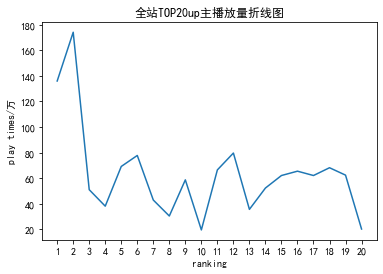

1
[('1', 'BV1Rv411B787', '最 强 汤 姆', '69.1', '2127', '20530305', '庄不纯'), ('2', 'BV1xV41167qm', '【𝟒𝐊 𝟔𝟎𝐅𝐏𝐒】这首《𝑭𝒂𝒍𝒍𝒊𝒏𝒈 𝑨𝒈𝒂𝒊𝒏》如今治愈了多少人！！!  ℳ₯㎕-沉 沦', '19.4', '859', '30502823', '学姐圆'), ('3', 'BV1mi4y1G7Rn', '大  威  天  妈', '25.3', '482', '50844167', '可靠de伏特加'), ('4', 'BV1Fi4y1V7du', '宇智波小少爷想让我告白', '13.2', '390', '599404508', '闷骚阿暑'), ('5', 'BV15A411e7Wx', '最    强    爷    爷', '20.9', '428', '31327256', '要来点当归吗'), ('6', 'BV1Jf4y117BF', '别说马赛克了，这些动漫角色化成灰我都认识！【动漫高手02】', '19.4', '2139', '808171', '吃素的狮子'), ('7', 'BV1xt4y1975D', '天津吉良吉影入驻B站', '15.1', '244', '1835967', '善良的诚哥'), ('8', 'BV1hv41167xK', '【过于真实】天 下 老 师 皆 是 一 家', '10.2', '1201', '130130236', '枫泽雨畔'), ('9', 'BV1FZ4y1u7W3', '业界真的要完！2020七月新番推荐', '14.2', '811', '730732', '瓶子君152'), ('10', 'BV1fZ4y1M7mq', '最深度致敬·EVA·CG作品 |  导演完全版《EVA超·现实》【授权发布】', '7.9', '130', '59550906', 'wuhu动画人空间'), ('11', 'BV1Qt4y197xB', '【怪诞小镇手书】MONSTER', '4.3', '402', '11774575', 'R翼君'), ('12', 'BV1Rz4y1Q7tg', '刻进DNA里的画面——前方名场景高能【BILIBILI 11周年】', '7.8', '436', '58635033

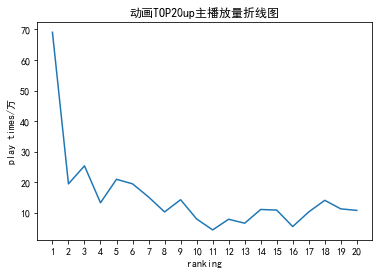

2
[('1', 'BV1Ga4y1e7c6', '冥 币 嫖 娼 定什么罪？', '136.0', '7370', '37529365', '互动大王'), ('2', 'BV1Cp4y1U7fp', '消费主义是如何对年轻人进行欺骗与洗脑的？【围炉夜话】', '30.3', '5051', '79577853', '智能路障'), ('3', 'BV1b54y1z7RL', '【半佛】B站的价值究竟在哪里？', '58.6', '1.8万', '37663924', '硬核的半佛仙人'), ('4', 'BV1PZ4y1u7JK', '【逸语道破09】希拉里，社交媒体政变的发起人，被特朗普用社交媒体干掉了', '35.5', '7557', '10330740', '观察者网'), ('5', 'BV1eD4y1Q7Bt', '【基德】为什么中国洪水越治理，经济损失越大？这是一种光看数据很容易导致的误区', '25.1', '4494', '510856133', '吟游诗人基德'), ('6', 'BV1xv411B7qM', '【睡前消息134】有人为“合村并居”批评山东，我想为山东说两句', '40.7', '8492', '54992199', '观视频工作室'), ('7', 'BV1Df4y117fq', '和中国一样大的太阳系模型！太阳系竟是如此空洞广阔！', '23.9', '1631', '544503411', '沙琪玛er'), ('8', 'BV1BC4y1a72c', '万人血书急求：全国一卷答案规律！【北清学长被迫营业】', '15.5', '602', '397706711', '汤茶铺'), ('9', 'BV11T4y1J7Lk', '为了做游戏，我花了10年自学程序、美术、音乐、策划', '13.7', '1361', '580207', 'AliveGameStudio'), ('10', 'BV1xT4y177Kq', '【罗翔】100g冰毒里掺50g面粉，怎么判？国际禁毒日', '27.7', '1794', '517327498', '罗翔说刑法'), ('11', 'BV13D4y1S7JZ', '全民反智？看不懂漫威，就看不懂美国(四) : 高科技魔法（B站独家）', '17.5', '6160', '495134

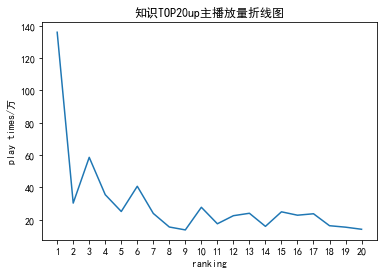

3
[('1', 'BV1vi4y1G7Lu', '美国枪支销量暴增80%，深入枪店采访美国人为何囤枪？', '174.2', '1.6万', '176037767', '我是郭杰瑞'), ('2', 'BV1bC4y1877x', '&quot;杜海皇&quot;之死', '77.7', '1.3万', '5970160', '小潮院长'), ('3', 'BV1YC4y187Hb', '又是一个无 眠 夜。', '42.8', '2105', '27756469', '奶糕成精档案社'), ('4', 'BV1mT4y1J7iG', '武松打得过这玩意儿？', '66.4', '1477', '496783876', '幸运猎手'), ('5', 'BV1DT4y1J7vA', '串串配烧烤，大sao第一次尝试本地宵夜大排档，一个人的量真过瘾', '79.6', '5894', '390461123', '徐大sao'), ('6', 'BV1Kf4y117Kq', '自制欧气检测器', '65.4', '2268', '280793434', '手工耿'), ('7', 'BV1PZ4y1u7YE', '试吃999元一桶的冰激凌，三种新奇吃法哪种最好吃？', '62.0', '9219', '2920960', '大祥哥来了'), ('8', 'BV1x5411Y75f', '【朱一旦】203 螳螂扑蝉 黄雀在后', '68.1', '2020', '437316738', '朱一旦的枯燥生活'), ('9', 'BV1Bz4y1X7FC', '就喜欢这种长得好看还没脑子的', '47.6', '782', '43979779', '捉鸡小队长'), ('10', 'BV1HC4y1a7BN', '这么完美的男人确实很难遇到', '43.1', '533', '344677344', 'z走酱巨无霸'), ('11', 'BV1Dp4y1U7r9', '能把一条鱼的鲜美淋漓尽致的体现出来，哪怕做法败家，那也是值得', '30.4', '2470', '415479453', '厨师长农国栋'), ('12', 'BV16K411n7UH', '“五秒就够了！”', '32.6', '3332', '5374954', '深海色带鱼'), ('13', 'BV1

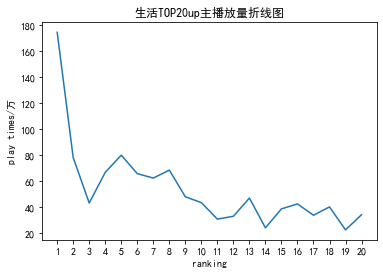

4
[('1', 'BV1pi4y147tQ', '最 强 法 海', '27.0', '1192', '96070394', '推背兔の'), ('2', 'BV1Mz4y1X7Nj', '【费玉污】《一剪梅》被删减版本！', '21.9', '1096', '375375', '伊丽莎白鼠'), ('3', 'BV1g54y1z7YH', '希望鬼畜区没事', '17.7', '271', '14426615', '天下万物皆可鬼畜'), ('4', 'BV1Ji4y1G7TV', '神仙打架', '17.4', '1075', '97395295', '一只胖头鱼o'), ('5', 'BV1BA411i75N', '【杨超越】斗地主第一名', '14.5', '688', '287485905', 'qfegy'), ('6', 'BV1yC4y187Dt', '【对王之王】小伙阿强', '16.4', '523', '301963634', '吃客伍二零'), ('7', 'BV18T4y1J7dT', '【杨超越爆笑rap】干啥啥不行，rap第一名！（全程高能）', '13.6', '987', '89338806', '纽毕斯'), ('8', 'BV1mt4y197gZ', '【大司马】马 动 闪 霸', '10.5', '209', '107079164', '空旷的蓝田'), ('9', 'BV17Z4y1H7NK', '执着的骚猪', '7.0', '110', '38347595', '风云熊'), ('10', 'BV1cp4y1Q7yn', '每天一遍，北大相见', '6.1', '147', '7275647', '碧天蓝钻'), ('11', 'BV1VV41167Vc', '当茄子拿起AK47', '7.6', '21', '31953347', '小果叮233'), ('12', 'BV1pi4y1x7s7', '王 雷 炸 鱼', '6.7', '83', '5938236', '墨菲potato'), ('13', 'BV1nf4y117Jn', '被期末考试耽误的歌神 ♪一言不合就开唱♪', '6.4', '399', '7792521', '还有一天就放假了'), ('14', 'BV1GZ4y1p7Be', '【杨超越】

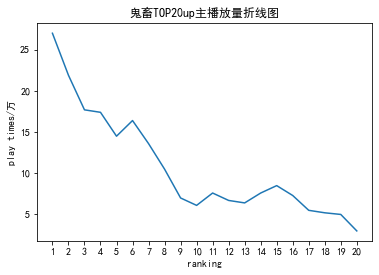

5
[('1', 'BV14A411i7v2', '10分钟高效瘦大腿根运动，躺床练出大腿缝，亲测一周见效！膝盖友好，无器械～', '9.3', '961', '369750017', '韩小四April'), ('2', 'BV1P5411Y7DW', '把「圆肩」当「驼背」，越纠正，斜方越大', '6.7', '218', '1531707', '叔贵'), ('3', 'BV1uz4y1X7A2', '长得像男的，怎么打扮最好看？', '12.8', '4655', '16206007', 'vivi可爱多'), ('4', 'BV1q64y1T7JE', '【中字】帕梅拉15分钟复古有氧舞蹈操！新手友好！欢乐瘦身！（Pamela Reif）', '7.0', '152', '34044873', '草莓味鸡胸肉'), ('5', 'BV1Yk4y1d7Wn', '每天10min，轻松get直角肩＋少女背! 消除猥琐斜方肌!圆肩驼背必看！', '6.9', '463', '493570956', '欧阳春晓Aurora'), ('6', 'BV1Pf4y117kf', '这确定是唇釉不是胶水', '16.6', '100', '128490440', '欧哦哦哦1'), ('7', 'BV1g54y1z7mh', '【一遍就会】温莎结的系法、搭配心得', '4.0', '51', '233563300', 'ENP_OFFICIAL'), ('8', 'BV1e5411W76n', '【减脂必看！】21天高效减脂丨如何规划饮食运动丨调整心态  拒绝复胖', '6.3', '59', '481637159', 'lunaVita'), ('9', 'BV1Xz411e7JH', '成功减肥40斤后的我，居然又复胖了30斤？！', '10.2', '512', '441827655', '侍知'), ('10', 'BV1fp4y1U7qG', '每天5分钟 *告别骨盆前倾，小肚子突出，大屁股*', '2.6', '54', '497257864', '小波健身'), ('11', 'BV1rv411B7ZZ', '你是冷皮还是暖皮？每个人都应该要知道 ｜ 5种方法判断', '7.3', '428', '325722471', '莫踪影'), ('12', 'BV

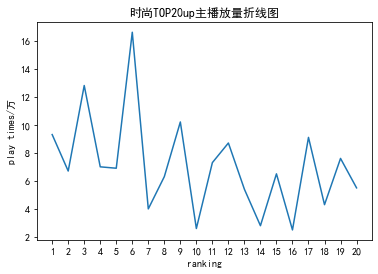

6
[('1', 'BV1SK4y1477d', 'BILIBILI 11周年演讲', '39.1', '8923', '8047632', '哔哩哔哩弹幕网'), ('2', 'BV1ZK411n79c', '【11周年】非正男团跨国庆生 他们最爱的UP主竟然是！？', '33.9', '3467', '235555226', '哔哩哔哩UP主执事'), ('3', 'BV1JV41167dJ', '【TSKS】Running Man.E509.200628.中字', '27.6', '1.2万', '43389575', '凤凰天使TSKS韩剧社官方账号'), ('4', 'BV16t4y197EF', '【秦昊】张东升空降直播间  一秒吓退所有观众', '26.8', '670', '16201391', '冯毛毛'), ('5', 'BV1uz4y1X76u', '【SBS综艺】Running Man E509.200628 主题：超能力学校竞赛 嘉宾：李相烨、姜汉娜 【TSKS】', '18.4', '5821', '27580511', '一只南音呀'), ('6', 'BV1jV41167Hu', '各大名山景区已换标语  禁止秦昊入内   哈哈哈    看过这个影视的都知道这个梗', '17.9', '96', '590530727', '彤碗'), ('7', 'BV1J54y1z76V', '揭秘“浪姐”内部鄙视链！黄圣依张雨绮宁静谁地位更高？', '15.6', '904', '180537674', '预言家Alice'), ('8', 'BV1Vz4y1X7Te', '《动物圈的问号脸》未播花絮 啊吗粽吐槽中国boy的智商储备不够', '16.1', '216', '429711841', '综艺哔哔姬'), ('9', 'BV1kg4y1v7NG', '【时代少年团】TNT随机街访之《舞会之前》', '8.0', '1.2万', '3670216', 'TF家族'), ('10', 'BV1qv411B7by', '【刘哔】盘点热门综艺搞笑名场面，第一个就笑到头掉！', '14.0', '1929', '27218150', '刘哔电影'), ('11', 'BV1Yp4y1U71W', '张艺兴《莲》MV Re-reaction', '

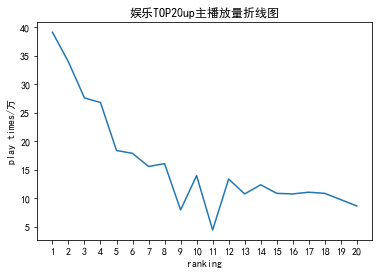

7
[('1', 'BV1qz4y1X7ss', '【隐秘的角落·百万剪辑】杀戮之途·你就是我！将34380秒的故事提炼成9分钟的“险恶之旅”！每一秒都是壁纸！', '50.9', '1193', '41149747', '怪兽电台MonsterBlog'), ('2', 'BV1yt4y1X75B', 'B站11周年特映《喜相逢》| 我们满心欢喜相逢在B站', '52.2', '1697', '8047632', '哔哩哔哩弹幕网'), ('3', 'BV19p4y1U7QU', '十八岁的赵薇到底有多惊艳，收情书都是按麻袋算的！', '46.6', '1032', '414008647', '张大帅太帅'), ('4', 'BV19k4y1q7e7', '【片片】隐藏结局全解读！国产悬疑封神作！最终真相令人窒息！过瘾解说《隐秘的角落》大结局', '42.3', '4276', '10119428', '小片片说大片'), ('5', 'BV1zp4y1U7Z5', '一个人，造出让40亿人震碎的夜晚！', '18.7', '1863', '3433092', '狂阿弥_'), ('6', 'BV1YV411k7E5', '【木鱼】盘点这几年火爆全网的六大名场面', '37.7', '2489', '927587', '木鱼水心'), ('7', 'BV1VK4y1s7Wd', '【1900】弑父灭口！比剧集黑暗百倍，解读18万字原著《隐秘的角落》，乖孩子缘何化身恶魔', '31.9', '1492', '17223352', '1900影剧室'), ('8', 'BV1mi4y1G7uv', '【老邪解说】《隐秘的角落》全集解析！看完头皮发麻的年度神剧！', '31.1', '609', '154021609', '老邪说电影'), ('9', 'BV1Fa4y1e7tJ', '《隐秘的角落》最后的秘密:电影感的真面目?干货向No.1解读【中队长拉片笔记】', '15.1', '2072', '393170813', '中队长同志'), ('10', 'BV1tp4y1D7zU', '不好意思，这次我必在热门！', '10.9', '261', '420689937', '盼盼罚吃小面包'), ('11', 'BV1zf4y117Xr', '用“今日说法”的方式

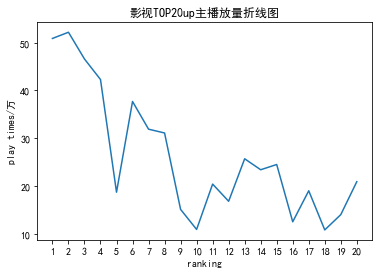

In [3]:
if __name__ == '__main__':    
    play=[]
    authors=[]
    authorName=[]
    authorHome=[]
    all=['0','1','36','160','119','155','5','181']    #查看B站相关页面可以知道，存在一些问题，由于网站的内容有的过点击万，有的没有，在正则表达式处理不好，所以去除了一部分
    stateAll={'0':'全站',
              '1':'动画',
              '36':'知识',
              '160':'生活',
              '119':'鬼畜',
              '155':'时尚',
              '5':'娱乐',
              '181':'影视'} 
    key=0
    for state in all:           
        stop=0
        true_url= get_url()  #组成相应的url   
        html=get_html(true_url)  
        print(key)
        #print(authors)
        authors.append([])
        authorName.append([])
        play.append([])
        authorName.append([])
        for stateDate in pick_up_state(html):
            print(stateDate)
            #print(stop)
            authors[key].append(stateDate['ranking'])
            authorName[key].append(stateDate['author'])
            play[key].append(eval(stateDate['play']))
            print(play)
            #print(authors)
            stop+=1
            if stop == 20:
                break        
        plt.title(stateAll[state]+'TOP20up主播放量折线图')
        plt.xlabel('ranking')
        plt.ylabel('play times/万')
        print(authors[key],play[key])
        plt.plot(authors[key],play[key])
        plt.savefig(stateAll[state]+'TOP20up主播放量折线图'+'.png')
        plt.show()
        key+=1               

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Asperger\AppData\Local\Temp\jieba.cache
Loading model cost 0.843 seconds.
Prefix dict has been built successfully.


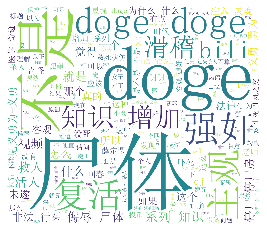

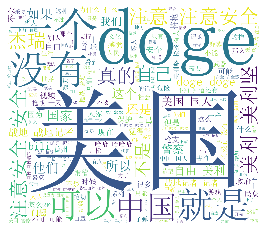

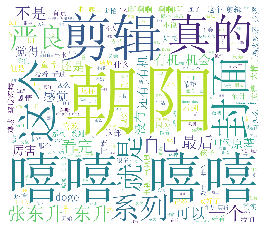

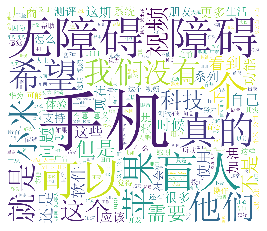

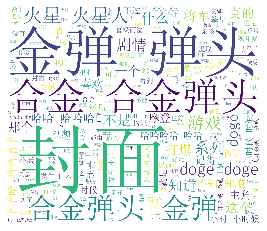

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
list=['互动大王',
      '我是郭杰瑞',
      '怪兽电台MonsterBlog',
      '小白测评',
      '庄不纯']
for i in list:
    text_from_file_with_apath = open(i+'.txt',encoding='utf-8').read()
    wordlist_after_jieba = jieba.cut(text_from_file_with_apath, cut_all = True)
    wl_space_split = " ".join(wordlist_after_jieba)
    my_wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2,font_path="simsun.ttc").generate(wl_space_split)

    plt.imshow(my_wordcloud)
    plt.savefig(i+'视频评论词云'+'.png')
    plt.axis("off")
    plt.show()